In [2]:
#Importaciones necesarias
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Lo que vamos a necesitar
plt.style.use('ggplot')
plt.rcParams['font.family'] = 'sans-serif' 
plt.rcParams['font.serif'] = 'Ubuntu' 
plt.rcParams['font.monospace'] = 'Ubuntu Mono' 
plt.rcParams['font.size'] = 14 
plt.rcParams['axes.labelsize'] = 12 
plt.rcParams['axes.labelweight'] = 'bold' 
plt.rcParams['axes.titlesize'] = 12 
plt.rcParams['xtick.labelsize'] = 12 
plt.rcParams['ytick.labelsize'] = 12 
plt.rcParams['legend.fontsize'] = 12 
plt.rcParams['figure.titlesize'] = 12 
plt.rcParams['image.cmap'] = 'jet' 
plt.rcParams['image.interpolation'] = 'none' 
plt.rcParams['figure.figsize'] = (12, 10) 
plt.rcParams['axes.grid']=False
plt.rcParams['lines.linewidth'] = 2 
plt.rcParams['lines.markersize'] = 8
colors = ['xkcd:pale orange', 'xkcd:sea blue', 'xkcd:pale red', 'xkcd:sage green', 'xkcd:terra cotta', 'xkcd:dull purple', 'xkcd:teal', 'xkcd: goldenrod', 'xkcd:cadet blue',
'xkcd:scarlet']

In [4]:
#Empezamos con el escenario mas simple "los paseos aleatorios"
#Es posible probar que la probabilidad de estar en un determinado estado, es decir, un número entero x,
#en el momento t+1 solo depende del estado en el momento t. En pocas palabras, es una Cadena de Markov.
#Así es como lo generamos:
start = 0
x = []
n = 10000
for i in range(n):
    step = np.random.choice([-1,1],p=[0.5,0.5])
    start = start + step
    x.append(start)

Text(0, 0.5, '$S_{n}$')

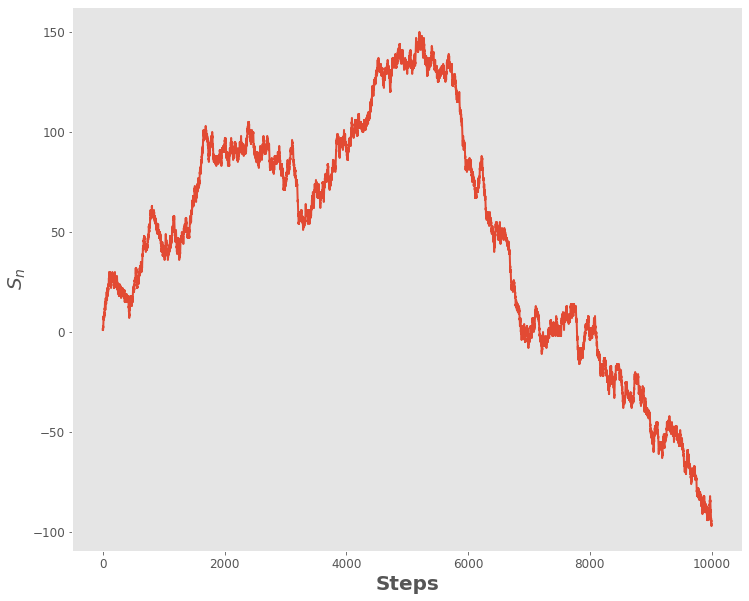

In [5]:
#Como resultado obtenemos
plt.plot(x)
plt.xlabel('Steps',fontsize=20)
plt.ylabel(r'$S_{n}$',fontsize=20)

In [6]:
#Ahora, la idea de la caminata aleatoria es simular lo que sucederá si decidimos comenzar desde un punto y elegimos aleatoriamente subir o bajar lanzando una moneda perfecta.
#Así que vamos a considerar 6 paseos aleatorios posibles. Tenga en cuenta que la probabilidad tiene que ser 1, por lo que es suficiente considerar la probabilidad "hacia arriba" o "hacia abajo".
#Así es como lo hacemos:
x = []
p = [[0.5,0.5],[0.9,0.1],[0.8,0.2],[0.6,0.4],[0.4,0.6],[0.2,0.8],[0.1,0.9]]
label_p = ['Simple',r'$p=0.9$',r'$p=0.8$',r'$p=0.6$',r'$p=0.4$',r'$p=0.2$',r'$p=0.1$']
n = 10000
x = []
for couple in p:
    x_p = []
    start = 0
    for i in range(n):
        step = np.random.choice([-1,1],p=couple)
        start = start + step
        x_p.append(start)
    x.append(x_p)

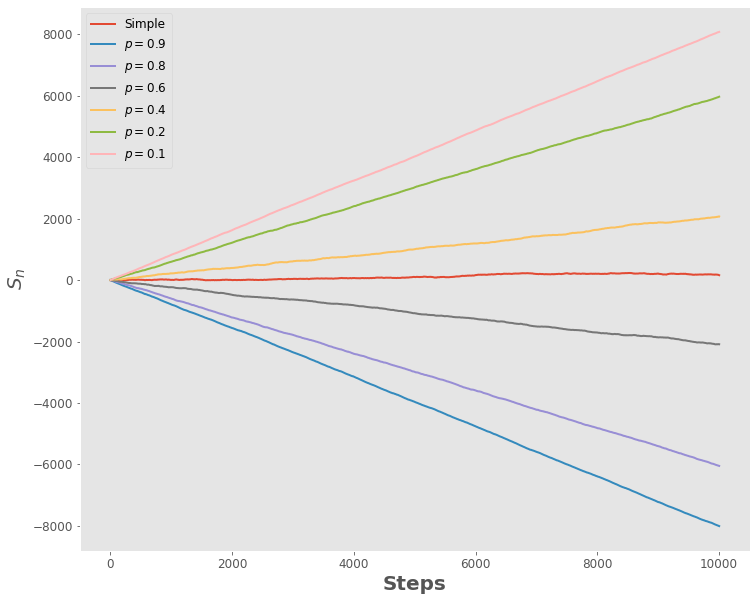

In [7]:
# esto es lo que pasa cuando lo visualizamos
i=0
for time_series in x:
    plt.plot(time_series, label = label_p[i])
    i=i+1
plt.xlabel('Steps',fontsize=20)
plt.ylabel(r'$S_{n}$',fontsize=20)
plt.legend()

In [8]:
#Otra forma sencilla de extender la caminata aleatoria es la cadena de ruina del jugador.
#Conceptualmente, es muy similar al paseo aleatorio: se parte de un estado x y se puede ir a un estado y=x+1 con probabilidad p oa un estado y=x-1 con probabilidad 1-p.
#La parte interesante es que cuando llegas a 1 o N básicamente estás atascado. No puedes hacer nada más que permanecer en ese estado para siempre
#Esta función, viene dada por:
#-un punto de partida 
#-el primer valor posible 
#-y el último valor posible 
#-el número de pasos 
#Te da el estado final:
def gamblersruinchain(start,first,last,n):
    for k in range(n):
        if start==first or start==last:
            start = start
        else:
            step = np.random.choice([-1,1],p=[0.5,0.5])
            start = start + step
    return start

Text(0, 0.5, 'Normalized Count')

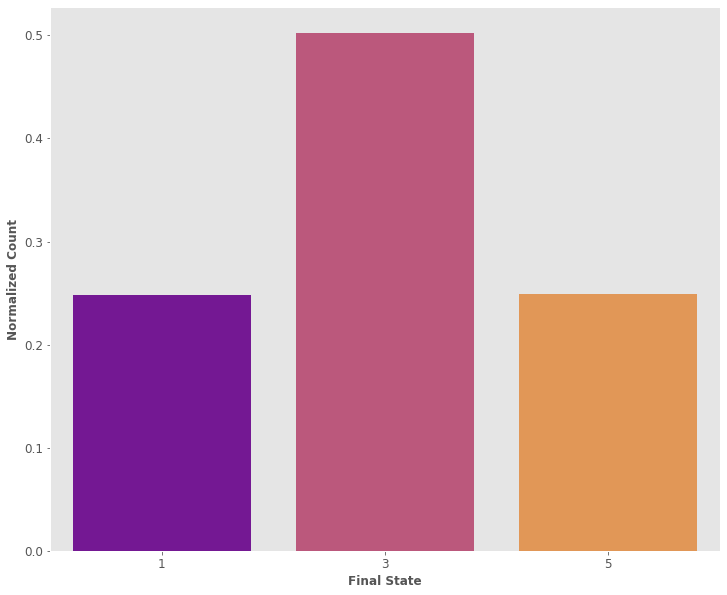

In [9]:
#Nuevamente, la idea de probabilidad es que si repetimos un experimento infinitas veces deberíamos poder verificar las ocurrencias sugeridas por los valores de probabilidad.
state_list = []
for i in range(100000):
    state_list.append(gamblersruinchain(3,0,5,2))
data_state = pd.DataFrame({'Final State':state_list})
data_occ = pd.DataFrame(data_state.value_counts('Final State')).rename(columns={0:'Count'})
data_occ['Count'] = data_occ['Count']/100000
sns.barplot(x=data_occ.index,y=data_occ['Count'],palette='plasma')
plt.ylabel('Normalized Count')

In [10]:
#Los modelos anteriores se utilizan como ejemplo introductorio de Cadenas de Markov. Intentemos ser creativos y construyamos un modelo completamente nuevo que no existe
#Un concepto importante es que el modelo se puede resumir usando la matriz de transición, que explica todo lo que puede suceder en su cadena de Markov. 
#Esta es la matriz de transición de nuestro modelo:
state_1 = [0.2,0.5,0.3,0,0]
state_2 = [0,0.5,0.5,0,0]
state_3 = [0,0,1,0,0]
state_4 = [0,0,0,0,1]
state_5 = [0,0,0,0.5,0.5]
trans_matrix = [state_1,state_2,state_3,state_4,state_5]
trans_matrix = np.array(trans_matrix)
trans_matrix


array([[0.2, 0.5, 0.3, 0. , 0. ],
       [0. , 0.5, 0.5, 0. , 0. ],
       [0. , 0. , 1. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 0.5, 0.5]])

In [11]:
#Hagamos un experimento para que podamos entender correctamente este concepto.
#Intuitivamente, podemos ver que la probabilidad de no volver al estado 2 a partir del estado 2 tiende a 0 a medida que el número de pasos tiende a infinito
#De hecho, si pasamos del estado 2 al estado 3 es imposible que volvamos al estado 2. Definamos esta función teórica como t(N), y grafiquémosla:
def t(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = 0.5**s
        y.append(v)
    return y

Text(0.5, 0, '$N-1$')

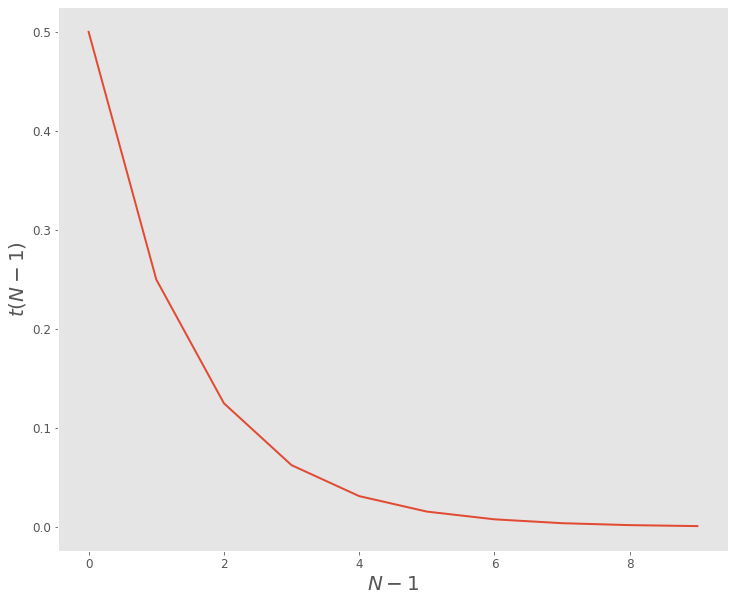

In [12]:
plt.plot(t(10))
plt.ylabel(r'$t(N-1)$',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)

In [13]:
#Ahora, usemos la Cadena de Markov y veamos si verificamos los mismos resultados.
#Partimos del estado 2 y verificamos después de N pasos la probabilidad de estar en el estado 2. La probabilidad, en este caso, es solo la relación entre el número de 2 
#en el estado final y el número de ocurrencias. Para ser consistente, el número de ocurrencias debe tender a infinito. Consideremos 1000 pruebas.
#Esta es la función que vamos a utilizar:
def prob(N):
    states = np.arange(1,6,1)
    steps = np.arange(1,N+1,1)
    n=1000
    state_collection = []
    for k in range(n):
        start = 2 
        for i in range(N):
            start = np.random.choice(states,p=trans_matrix[start-1])
        if start==2:
            state_collection.append(1)
        else:
            state_collection.append(0)
    state_collection = np.array(state_collection)
    return state_collection.sum()/n

In [14]:
#Usemos esta función para varios N y llamemos a esto p(N):
def p(N):
    step = np.arange(1,N+1,1)
    y = []
    for s in step:
        v = prob(s)
        y.append(v)
    return y

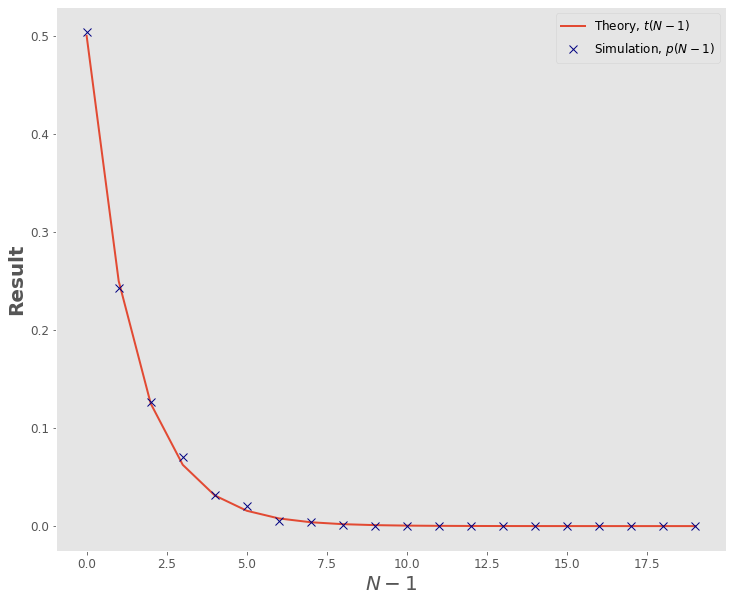

In [15]:
#Vamos a ver el resultado para ello hemos utilizado la matriz de transición para hacer esta simulación.
p_20 = p(20)
plt.plot(t(20),label=r'Theory, $t(N-1)$')
plt.plot(p_20,'x',label=r'Simulation, $p(N-1)$',color='navy')
plt.ylabel(r'Result',fontsize=20)
plt.xlabel(r'$N-1$',fontsize=20)
plt.legend()